In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('sales_data.csv')  
print (df)


      Product Region  Sales  Profit  Discount         Category        Date
0      Laptop  North   1200     300      0.10      Electronics  2023-01-31
1      Tablet  South    800     200      0.15      Electronics  2023-02-28
2       Phone   East   1500     400      0.20      Electronics  2023-03-31
3     Monitor   West    700     150      0.05      Electronics  2023-04-30
4     Printer  North    650     100      0.10  Office Supplies  2023-05-31
5  Headphones   East    300      50      0.20      Accessories  2023-06-30
6       Mouse  South    450      75      0.15      Accessories  2023-07-31
7    Keyboard   West    500     100      0.10      Accessories  2023-08-31
8     Charger  North    400      90      0.05      Accessories  2023-09-30
9      Camera   East    900     250      0.20      Electronics  2023-10-31


In [3]:
print(df.shape)



(10, 7)


In [4]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   10 non-null     object 
 1   Region    10 non-null     object 
 2   Sales     10 non-null     int64  
 3   Profit    10 non-null     int64  
 4   Discount  10 non-null     float64
 5   Category  10 non-null     object 
 6   Date      10 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 692.0+ bytes
None


In [5]:
print(df.describe())

             Sales      Profit   Discount
count    10.000000   10.000000  10.000000
mean    740.000000  171.500000   0.130000
std     376.976274  114.067475   0.058689
min     300.000000   50.000000   0.050000
25%     462.500000   92.500000   0.100000
50%     675.000000  125.000000   0.125000
75%     875.000000  237.500000   0.187500
max    1500.000000  400.000000   0.200000


In [6]:
print(df.isnull().sum())  # Check for missing values

Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [7]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [9]:
print(df.columns)



Index(['Product', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Date'], dtype='object')


In [10]:
df.columns = df.columns.str.strip()

In [12]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Exploratry Data Analysis

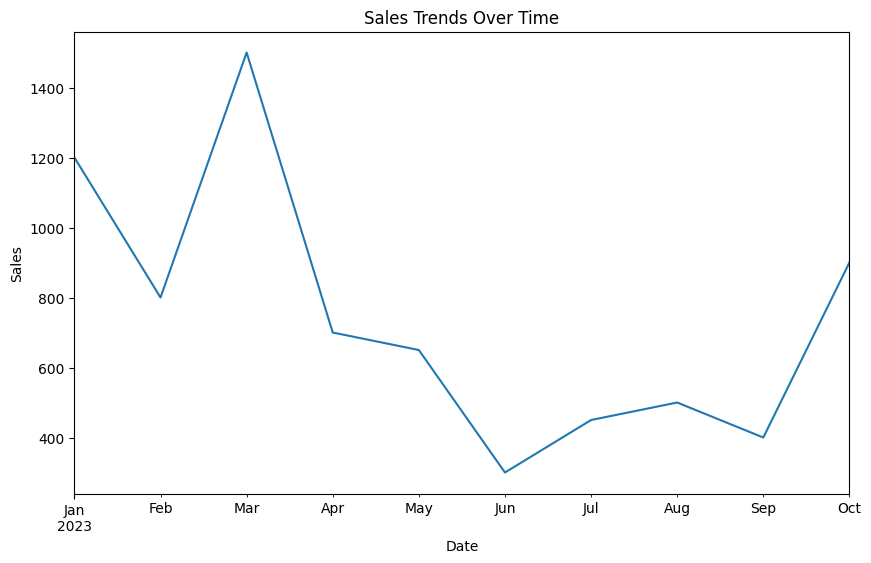

In [15]:
sales_trend = df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(10, 6))
sales_trend.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

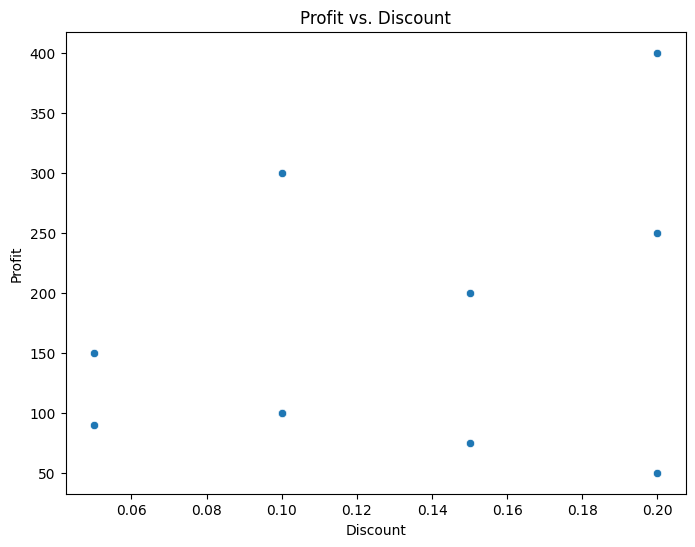

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Profit vs. Discount')
plt.show()

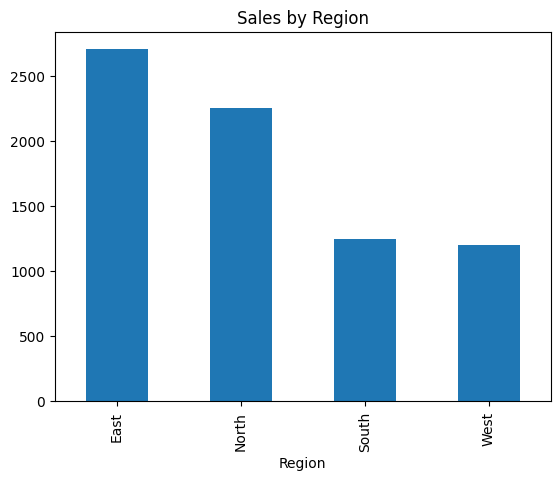

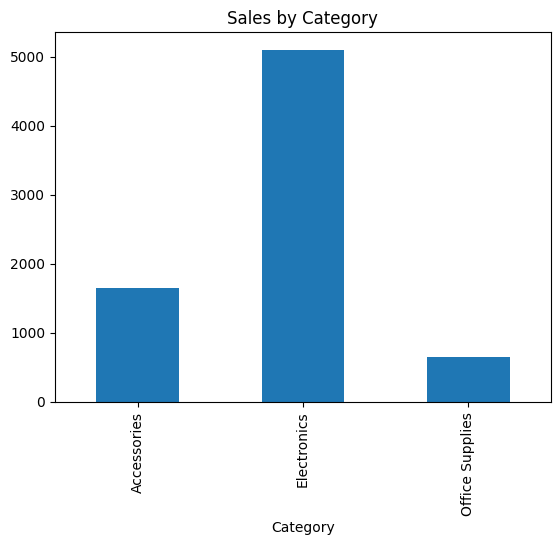

In [17]:
sales_region = df.groupby('Region')['Sales'].sum()
sales_region.plot(kind='bar', title='Sales by Region')
plt.show()

sales_category = df.groupby('Category')['Sales'].sum()
sales_category.plot(kind='bar', title='Sales by Category')
plt.show()


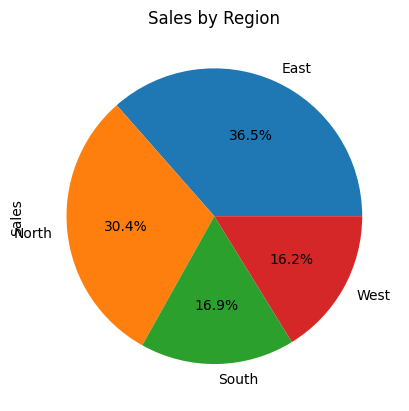

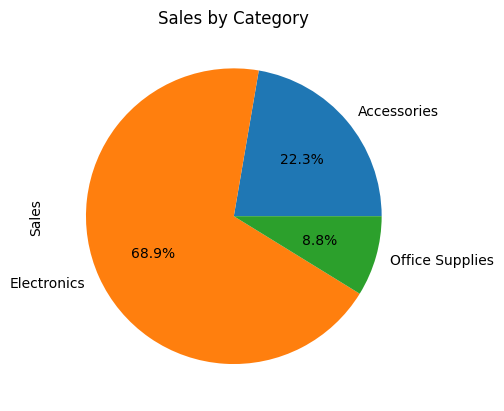

In [18]:
sales_region.plot(kind='pie', autopct='%1.1f%%', title='Sales by Region')
plt.show()

sales_category.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.show()


In [21]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.1 MB 1.0 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.1 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.1 MB 713.8 kB/s eta 0:00:14
   ------ --------------------------------- 1.8/11.1 MB 883.1 kB/s eta 0:00:11
   ------- -------------------------------- 2.1/11.1 MB 947.3 kB/s eta 0:00:10
   --------- ------------------------------ 2.6/11.1 MB 1.1 MB/s eta 0:00:08
   -----------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#Predictive Modeling
#Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 11762.412850115334
R²: 0.7059396787471166
